# 多重共線性(Multicollinearity)

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 載入資料

In [3]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples = 100,n_features=1,noise = 10,random_state=42)


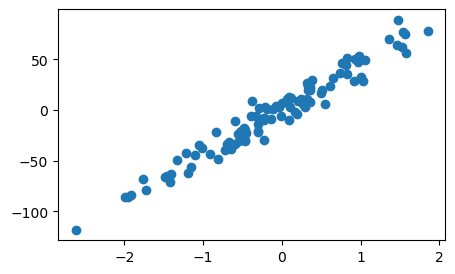

In [4]:
plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.show()

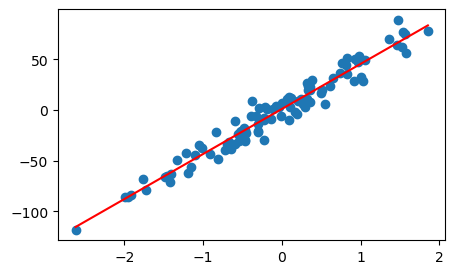

coef: 44.437169992254965


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
#print(X.shape)
#X.reshape(-1)
X_pred = np.linspace(np.min(X.reshape(-1)),np.max(X.reshape(-1)),20)
y_pred = X_pred * model.coef_[0] + model.intercept_
plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.plot(X_pred,y_pred,c="red")
plt.show()
print("coef:",model.coef_[0])

In [20]:
model.score(X,y)

0.9538252459635717

## 產生X的共線資料

In [21]:
X2 = X.copy()
X_new = np.hstack((X,X2))
print(X_new.shape)

(100, 2)


In [22]:
X_new[:10]

array([[ 0.93128012,  0.93128012],
       [ 0.08704707,  0.08704707],
       [-1.05771093, -1.05771093],
       [ 0.31424733,  0.31424733],
       [-0.47917424, -0.47917424],
       [ 0.64768854,  0.64768854],
       [-0.46341769, -0.46341769],
       [ 0.54256004,  0.54256004],
       [ 0.61167629,  0.61167629],
       [ 1.0035329 ,  1.0035329 ]])

In [23]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_new,y)


LinearRegression()

In [ ]:
model2.coef_

array([22.218585, 22.218585])

## Variance Inflation Factor(VIF)


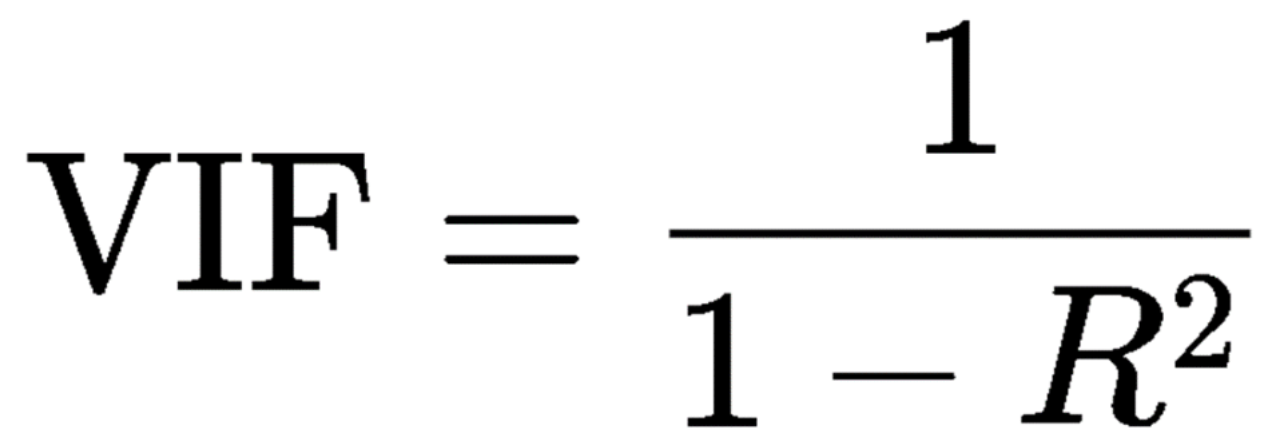

R^2越靠近1表示X2與X3越能表示X1 表示共線機率大
使用X2與X3預測X1的R^2是多少 作為VIF的R^2
VIF越大表示共線性越大


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
print(X_new.shape[1])

VIF = [variance_inflation_factor(X_new,i) for i in range(X_new.shape[1])]
VIF

2


[inf, inf]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = pd.read_csv("BMI.csv")
#data.head()
data["Gender"] = data["Gender"].map({"Male":0,"Female":1})
data.head()
X = data[["Gender","Height","Weight"]]
vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
#Gender Male:0 Female:
#VIF 值大於 5 或 10 通常會被認為存在多重共線性。
vif_data

,features,VIF
0,Gender,2.028864
1,Height,11.623103
2,Weight,10.688377


In [35]:
X.values

array([[  0, 174,  96],
       [  0, 189,  87],
       [  1, 185, 110],
       ...,
       [  1, 141, 136],
       [  0, 150,  95],
       [  0, 173, 131]], dtype=int64)

# Sequential Feature Selection(SFS)

In [36]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
X,y = load_wine(return_X_y=True,as_frame=True)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((124, 13), (54, 13), (124,), (54,))

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()



In [41]:
clf.fit(X_train_std,y_train)

LogisticRegression()

In [42]:
clf.score(X_test_std,y_test)

0.9814814814814815

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
knn = KNeighborsClassifier(n_neighbors=11)
sfs = SequentialFeatureSelector(knn,n_features_to_select=3)
sfs.fit(X_train_std,y_train)
sfs.get_support()


array([False, False, False, False, False, False,  True, False, False,
        True, False, False,  True])

In [46]:
colum_list = np.array(X.columns.to_list())
colum_list[sfs.get_support()]

array(['flavanoids', 'color_intensity', 'proline'], dtype='<U28')

In [47]:
sfs.get_feature_names_out(colum_list)

array(['flavanoids', 'color_intensity', 'proline'], dtype=object)

In [48]:
sfs.transform(X_train_std).shape

(124, 3)

In [49]:
clf = LogisticRegression()
clf.fit(sfs.transform(X_train_std),y_train)
clf.score(sfs.transform(X_test_std),y_test)

0.9814814814814815

In [51]:
import itertools
myList = ["A","B","C","D","E"]
c = itertools.combinations(myList,2)
for v in c:
    print(v)


('A', 'B')
('A', 'C')
('A', 'D')
('A', 'E')
('B', 'C')
('B', 'D')
('B', 'E')
('C', 'D')
('C', 'E')
('D', 'E')


In [56]:
from itertools import combinations
from sklearn.metrics import accuracy_score
X,y = load_wine(return_X_y=True,as_frame=True)
feature_name = X.columns
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
N = 3
base_acc = 0
base_freature = None
for subset in combinations(feature_name,N):
    #print(subset)
    model = KNeighborsClassifier(n_neighbors=11)
    model.fit(X_train[list(subset)],y_train)
    y_pred = model.predict(X_test[list(subset)])
    acc = accuracy_score(y_test,y_pred)
    if acc > base_acc:
        base_acc = acc
        base_freature = subset
print("特徵:",base_freature)
print("準確率:",f"{base_acc:.3f}")        

特徵: ('alcohol', 'total_phenols', 'flavanoids')
準確率: 0.944


In [57]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X,y = load_wine(return_X_y=True,as_frame=True)
feature_name = X.columns
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
N = 3
base_acc = 0
base_freature = None
for subset in combinations(feature_name,N):
    #print(subset)
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train[list(subset)],y_train)
    y_pred = model.predict(X_test[list(subset)])
    acc = accuracy_score(y_test,y_pred)
    if acc > base_acc:
        base_acc = acc
        base_freature = subset
print("特徵:",base_freature)
print("準確率:",f"{base_acc:.3f}")        

特徵: ('alcohol', 'flavanoids', 'proline')
準確率: 0.981


# Recursive Feature Elimination (RFE)

In [72]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
X,y = load_wine(return_X_y=True,as_frame=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [75]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_std,y_train)
clf.score(X_test_std,y_test)

0.9814814814814815

In [78]:
from sklearn.feature_selection  import RFE
clf = LogisticRegression()
# RFE 使用的評估演算法必須支援 coef_ or feature_importances_ 屬性，KNN 不適用
model = RFE(clf,n_features_to_select=3)
model.fit(X_train_std,y_train)
model.get_support()

array([False, False, False, False, False, False,  True, False, False,
       False,  True, False,  True])

In [79]:
clf = LogisticRegression()
clf.fit(model.transform(X_train_std),y_train)


LogisticRegression()

In [80]:
clf.score(model.transform(X_test_std),y_test)


0.9814814814814815

### 交叉驗證簡介

在這個系列講座中，我們將深入探討各種交叉驗證的方法，並討論交叉驗證的基本原理。這裡有一個不錯的官方文件指南，可以參考：[Scikit-learn 交叉驗證指南](https://scikit-learn.org/stable/modules/cross_validation.html)

### 什麼是交叉驗證？

交叉驗證是一種評估機器學習模型性能的技術。其主要目的是確保模型在新數據上的泛化能力。交叉驗證通過將數據集分成多個子集，然後對每個子集進行訓練和測試來實現這一目標。

### 交叉驗證的方法

1. **K折交叉驗證（K-Fold Cross-Validation）**
   - 數據集被分成K個等分的子集。
   - 每次使用K-1個子集進行訓練，剩下一個子集進行測試。
   - 重複K次，每次選擇不同的子集作為測試集，最終取平均值作為模型性能評估。
2. **分層K折交叉驗證（Stratified K-Fold Cross-Validation）**
   - 適用於分類問題，確保每個子集中各類別樣本的比例與原始數據集相同。

3. **隨機劃分交叉驗證（Shuffle-Split Cross-Validation）**
   - 每次隨機打亂數據集並劃分為訓練集和測試集。
   - 重複多次，取平均值作為模型性能評估。

### 交叉驗證的哲學

交叉驗證的核心理念是通過多次訓練和測試來更全面地評估模型的性能。這樣可以減少模型過擬合的風險，並確保模型能夠在不同的數據上保持穩定的表現。

### 小結

交叉驗證是一種強大的模型評估工具，適用於各種機器學習任務。在實際應用中，選擇合適的交叉驗證方法可以顯著提高模型的泛化能力和性能。更詳細的內容請參閱[Scikit-learn 交叉驗證指南](https://scikit-learn.org/stable/modules/cross_validation.html)。

### K折交叉驗證（K-Fold Cross-Validation）實際案例

假設我們有一個包含100個樣本的數據集，並且我們選擇K=5進行K折交叉驗證。這意味著我們將數據集分成5個等大小的子集，每個子集包含20個樣本。以下是K折交叉驗證的過程：

1. **數據集劃分**：
   - Fold 1: 樣本1-20
   - Fold 2: 樣本21-40
   - Fold 3: 樣本41-60
   - Fold 4: 樣本61-80
   - Fold 5: 樣本81-100

2. **迭代過程**：
   - **第一次迭代**：
     - 訓練集：Fold 2, Fold 3, Fold 4, Fold 5
     - 測試集：Fold 1
   - **第二次迭代**：
     - 訓練集：Fold 1, Fold 3, Fold 4, Fold 5
     - 測試集：Fold 2
   - **第三次迭代**：
     - 訓練集：Fold 1, Fold 2, Fold 4, Fold 5
     - 測試集：Fold 3
   - **第四次迭代**：
     - 訓練集：Fold 1, Fold 2, Fold 3, Fold 5
     - 測試集：Fold 4
   - **第五次迭代**：
     - 訓練集：Fold 1, Fold 2, Fold 3, Fold 4
     - 測試集：Fold 5

3. **結果評估**：每次迭代都會得到一個模型性能評估指標（如準確率），最終取這5個指標的平均值作為模型的最終性能評估。



#### K折交叉驗證應用場景

- **分類任務**：在醫療診斷中，使用K折交叉驗證評估一個分類模型（如判斷一個病人是否患有某種疾病）。數據集可能包含幾千個病人樣本，選擇K=10進行交叉驗證，這樣每次訓練集包含90%的數據，測試集包含10%的數據。

- **回歸任務**：在房價預測中，使用K折交叉驗證評估回歸模型（如預測房子的價格）。數據集可能包含上千個房屋樣本，選擇K=5進行交叉驗證，每次訓練集包含80%的數據，測試集包含20%的數據。

### 訓練集和測試集的比例

- **訓練集**：每次迭代中，訓練集包含K-1個子集。
  - 當K=5時，訓練集包含4個子集（即80%的數據）。
- **測試集**：每次迭代中，測試集包含1個子集。
  - 當K=5時，測試集包含1個子集（即20%的數據）。

### 公式計算

- **訓練集比例**：$(\frac{K-1}{K})$
  - 當K=5時：$(\frac{5-1}{5} = \frac{4}{5} = 0.8)$（即80%）
- **測試集比例**：$(\frac{1}{K})$
  - 當K=5時：$(\frac{1}{5} = 0.2)$（即20%）



#### 留一法交叉驗證應用場景

- **小樣本數據集**：在心理學研究中，可能只有少量的受試者（如20個受試者），使用LOOCV可以充分利用每個受試者的數據來評估模型的性能。

- **稀有疾病研究**：當研究某種稀有疾病時，可能只有少數病人數據，使用LOOCV能夠最大限度地利用這些有限的數據來訓練和評估模型。

總結來說，K折交叉驗證和留一法交叉驗證各有優缺點，選擇合適的方法取決於數據集的大小和具體的應用場景。

In [81]:
df = pd.read_csv("./Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [82]:
from sklearn.linear_model import Ridge
X = df.drop("sales",axis = 1)
y = df["sales"]


In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [84]:
model = Ridge(alpha=100)

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
score = cross_val_score(model,X_train_std,y_train,cv=5)


In [89]:
score.mean()

0.6883911080223275

## RFECV

In [93]:
X,y = load_wine(return_X_y=True,as_frame=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [94]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
#min_features_to_select 最少選取3個特徵
model = RFECV(clf,min_features_to_select=3,cv=5)
model.fit(X_train_std,y_train)
model.get_support()

array([ True, False,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True])

In [95]:
clf = LogisticRegression()
clf.fit(model.transform(X_train_std),y_train)

LogisticRegression()

In [96]:
clf.score(model.transform(X_test_std),y_test)

1.0

In [133]:
X,y = load_wine(return_X_y=True,as_frame=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.inspection import permutation_importance
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_std,y_train)
model = permutation_importance(clf,X_test_std,y_test,n_repeats=10)
model.importances_mean,model.importances_std

(array([ 0.03148148,  0.00555556,  0.0037037 ,  0.00555556,  0.01666667,
        -0.00555556,  0.01851852,  0.00740741,  0.01296296,  0.0537037 ,
         0.00925926, -0.00740741,  0.06666667]),
 array([0.01446343, 0.01666667, 0.01111111, 0.01446343, 0.0193339 ,
        0.01185764, 0.02028602, 0.00907218, 0.01446343, 0.02407407,
        0.0124226 , 0.00907218, 0.02771598]))

In [134]:
column_selected = []
meanArgSort = model.importances_mean.argsort()
for i in meanArgSort[::-1]:
    if model.importances_mean[i] - 2*model.importances_std[i] > 0:
        print(f"column:{X.columns[i]}",f"mean:{model.importances_mean[i]:.3f}")
        column_selected.append(X.columns[i])
print(column_selected)        

column:proline mean:0.067
column:color_intensity mean:0.054
column:alcohol mean:0.031
['proline', 'color_intensity', 'alcohol']


In [135]:
X,y = load_wine(return_X_y=True,as_frame=True)
X = X[column_selected]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [136]:
clf = LogisticRegression()
clf.fit(X_train_std,y_train)
clf.score(X_test_std,y_test)

0.8888888888888888